<a href="https://colab.research.google.com/github/alpha597/ML_LAB_ASSIGNMENTS/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('/content/sample_data/winequality-red.csv', delimiter=';')

df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df=df.sample(frac=1.0).reset_index(drop=True)
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.1,0.590,0.00,2.2,0.078,26.0,44.0,0.99522,3.42,0.68,10.8,6
1,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5
2,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6
3,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
4,6.9,0.390,0.24,2.1,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,4


In [24]:
class_distribution = df['quality'].value_counts()
print(class_distribution)

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


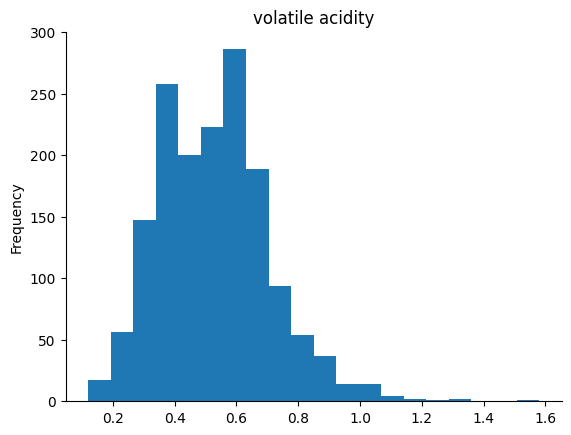

In [ ]:
# @title volatile acidity

from matplotlib import pyplot as plt
df['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

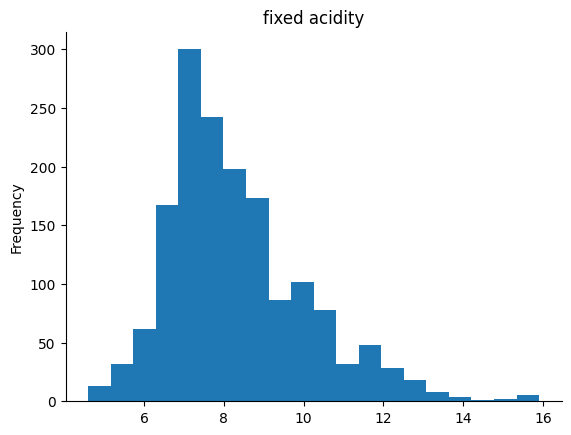

In [ ]:
# @title fixed acidity

from matplotlib import pyplot as plt
df['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
from sklearn.metrics import roc_curve, auc


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = SVC(kernel='linear', C=1, gamma=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.74      0.74      0.74       148
           6       0.47      0.73      0.58       112
           7       0.00      0.00      0.00        45
           8       0.00      0.00      0.00         6

    accuracy                           0.60       320
   macro avg       0.20      0.24      0.22       320
weighted avg       0.51      0.60      0.54       320

[[  0   0   2   0   0   0]
 [  0   0   4   3   0   0]
 [  0   0 109  39   0   0]
 [  0   0  30  82   0   0]
 [  0   0   2  43   0   0]
 [  0   0   0   6   0   0]]


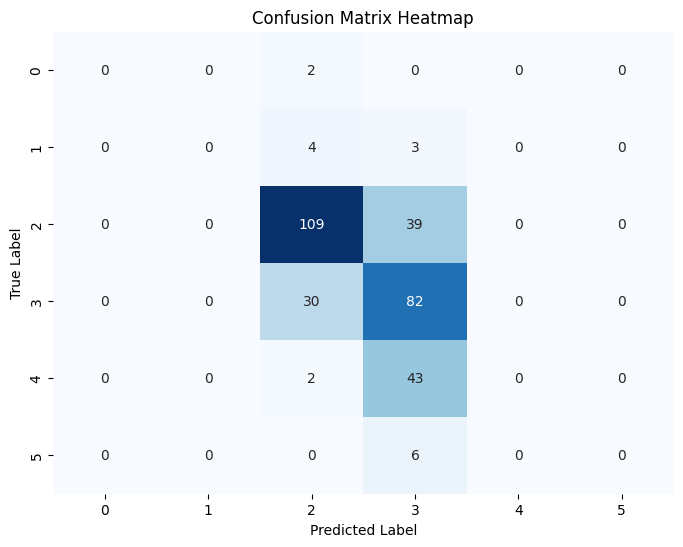

In [25]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.84      0.74      0.79       148
           6       0.56      0.81      0.66       112
           7       0.81      0.49      0.61        45
           8       0.00      0.00      0.00         6

    accuracy                           0.70       320
   macro avg       0.37      0.34      0.34       320
weighted avg       0.70      0.70      0.68       320

[[  0   0   1   1   0   0]
 [  0   0   2   5   0   0]
 [  0   0 110  38   0   0]
 [  0   0  17  91   4   0]
 [  0   0   1  22  22   0]
 [  0   0   0   5   1   0]]


/tmp/ipython-input-1239734081.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


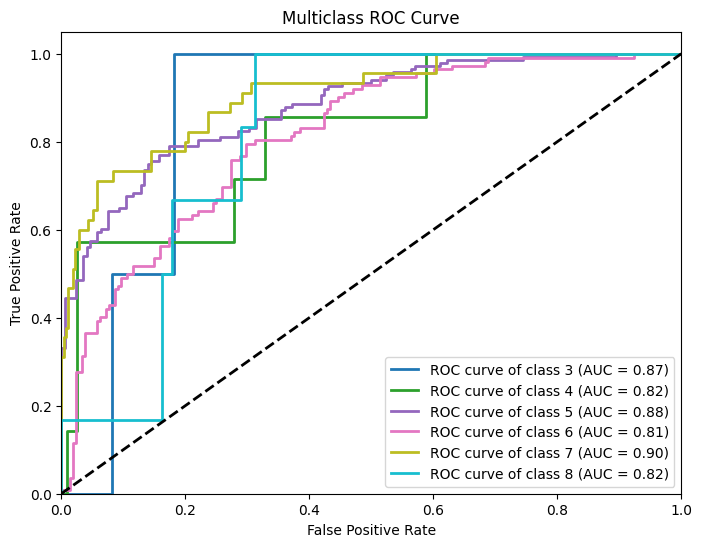

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

svc2 = SVC(kernel='rbf', C=1, gamma=1, probability=True) # Enable probability estimation
svc2.fit(X_train, y_train)
y_pred = svc2.predict(X_test)
y_prob = svc2.predict_proba(X_test) # Get predicted probabilities

print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC curve and AUC for each class using One-vs-Rest strategy
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.418 total time=   0.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.434 total time=   0.1s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.418 total time=   0.1s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.418 total time=   0.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.416 total time=   0.2s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.578 total time=   0.1s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.551 total time=   0.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.582 total time=   0.1s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.592 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.527 total time=   0.1s
[CV 2/5] END .................C=0.1, gamma=0.01;

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.14      0.20         7
           5       0.82      0.73      0.77       148
           6       0.59      0.71      0.64       112
           7       0.62      0.62      0.62        45
           8       0.25      0.17      0.20         6

    accuracy                           0.68       320
   macro avg       0.43      0.39      0.41       320
weighted avg       0.68      0.68      0.68       320

[[  0   0   1   1   0   0]
 [  1   1   2   3   0   0]
 [  0   1 108  35   4   0]
 [  0   1  18  79  11   3]
 [  0   0   3  14  28   0]
 [  0   0   0   3   2   1]]


/tmp/ipython-input-2015785391.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


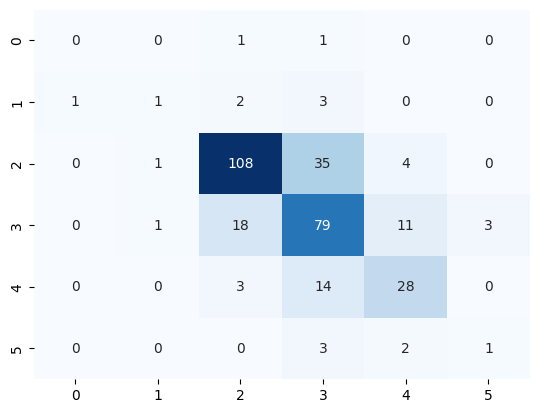

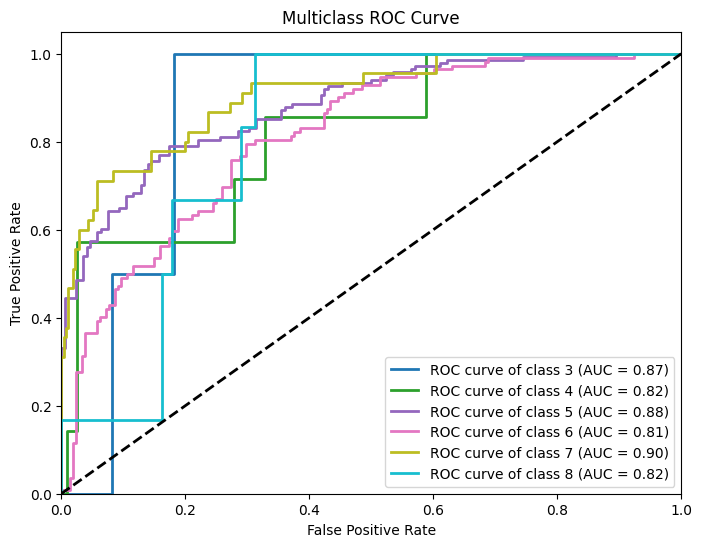

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.82      0.76      0.79       148
           6       0.59      0.77      0.67       112
           7       0.64      0.51      0.57        45
           8       1.00      0.17      0.29         6

    accuracy                           0.69       320
   macro avg       0.51      0.37      0.39       320
weighted avg       0.70      0.69      0.68       320

[[  0   0   2   0   0   0]
 [  1   0   3   3   0   0]
 [  0   0 112  33   3   0]
 [  0   1  17  86   8   0]
 [  0   0   2  20  23   0]
 [  0   0   0   3   2   1]]


/tmp/ipython-input-2058330847.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


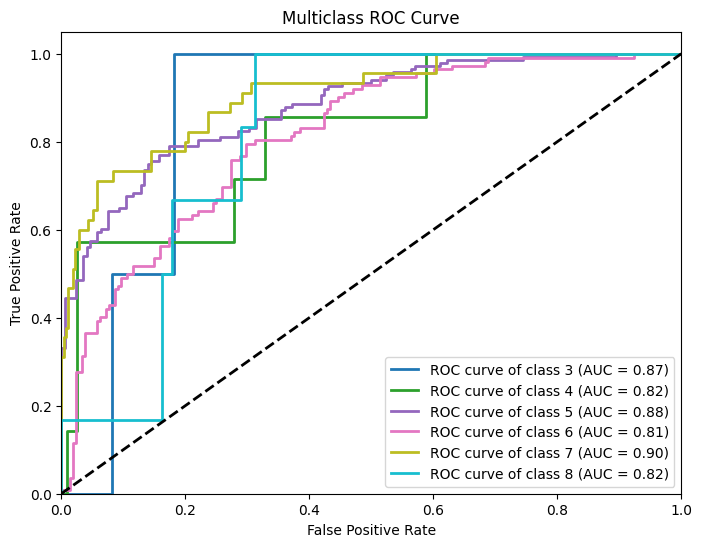

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.80      0.72      0.76       148
           6       0.55      0.70      0.62       112
           7       0.54      0.49      0.51        45
           8       0.50      0.17      0.25         6

    accuracy                           0.65       320
   macro avg       0.40      0.35      0.36       320
weighted avg       0.65      0.65      0.64       320

[[  0   0   2   0   0   0]
 [  0   0   6   1   0   0]
 [  0   0 107  36   5   0]
 [  0   2  19  78  12   1]
 [  0   0   0  23  22   0]
 [  0   0   0   3   2   1]]


/tmp/ipython-input-1520118886.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes


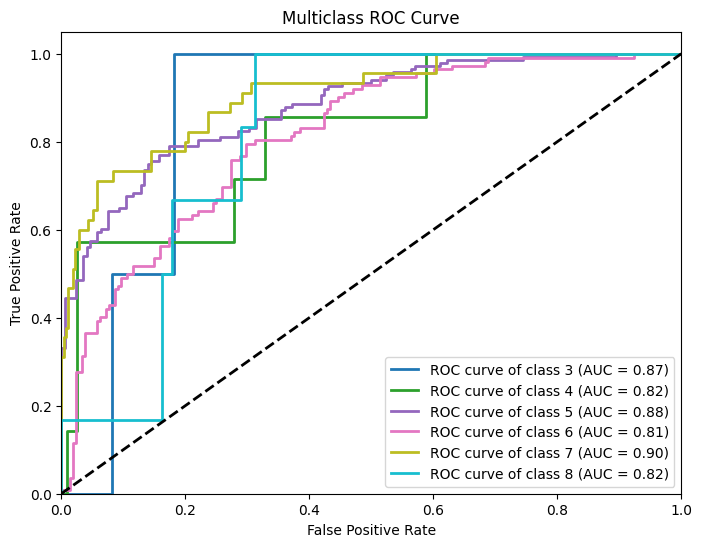

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print(confusion_matrix(y_test, y_pred))
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=np.unique(y_test)[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes) # Get a colormap for different classes
for i, color in zip(range(n_classes), colors.colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {np.unique(y_test)[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()